<a href="https://colab.research.google.com/github/mayconmota/DIO-Analise-de-dados-com-Python-e-Pandas/blob/main/Projeto_Final_An%C3%A1lise_de_dados_com_Python_e_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto Final: Análise de dados com Python e Pandas**



Para finalização deste treinamento estarei refazendo a atividade desenvolvida na sexta aula, onde estarei gerando alguns gráficos adicionais, aplicando alguns estilos, e realizando marcações com coloração para apontar valores máximos e mínimos.

Link dos arquivos utilizados: https://hermes.digitalinnovation.one/lab_projects/files/2be7520c-94cd-463f-8432-d580d0810344.zip


In [160]:
#Importando as bibliotecas pandas e matplot, e definindo o estilo
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
cmaps = OrderedDict()
plt.style.use("seaborn")

In [161]:
#Leitura dos arquivos, e atribuição às variáveis de armazenamento
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [162]:
#Juntando todos os arquivos e atribuindo à uma variável
df = pd.concat([df1,df2,df3,df4,df5])

In [163]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [164]:
#Exibindo as 20 primeiras linhas do novo dataframe e colorindo a célula de maior valor no range visualizado
df.head(20).style.highlight_max(subset=["Vendas"], color="green")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01 00:00:00,142.000000,1520,1,142.000000
1,Aracaju,2018-01-01 00:00:00,14.210000,1522,6,85.260000
2,Aracaju,2018-01-01 00:00:00,71.550000,1520,1,71.550000
3,Aracaju,2018-01-01 00:00:00,3.010000,1521,7,21.070000
4,Aracaju,2018-01-01 00:00:00,24.510000,1522,8,196.080000
5,Aracaju,2018-01-01 00:00:00,156.200000,1522,1,156.200000
6,Aracaju,2018-01-01 00:00:00,35.500000,1522,2,71.000000
7,Aracaju,2019-01-01 00:00:00,172.220000,1522,6,1033.320000
8,Aracaju,2019-01-01 00:00:00,12.160000,1523,1,12.160000
9,Aracaju,2019-01-01 00:00:00,149.360000,1523,3,448.080000


In [165]:
#Exibindo as 20 primeiras linhas do novo dataframe e colorindo a célula de menor valor no range visualizado
df.head(20).style.highlight_min(subset=["Vendas"], color="red")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01 00:00:00,142.000000,1520,1,142.000000
1,Aracaju,2018-01-01 00:00:00,14.210000,1522,6,85.260000
2,Aracaju,2018-01-01 00:00:00,71.550000,1520,1,71.550000
3,Aracaju,2018-01-01 00:00:00,3.010000,1521,7,21.070000
4,Aracaju,2018-01-01 00:00:00,24.510000,1522,8,196.080000
5,Aracaju,2018-01-01 00:00:00,156.200000,1522,1,156.200000
6,Aracaju,2018-01-01 00:00:00,35.500000,1522,2,71.000000
7,Aracaju,2019-01-01 00:00:00,172.220000,1522,6,1033.320000
8,Aracaju,2019-01-01 00:00:00,12.160000,1523,1,12.160000
9,Aracaju,2019-01-01 00:00:00,149.360000,1523,3,448.080000


In [166]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [167]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [168]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [171]:
#Retornando 20 amostras aleatórias do dataframe e adicionando um novo estilo para visualização
df.sample(20).style.background_gradient(cmap='BuPu')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
11,Natal,2019-02-09 00:00:00,564.000000,853,3,1692.000000,2019
102,Salvador,2019-01-01 00:00:00,40.840000,1034,3,122.520000,2019
88,Aracaju,2018-01-01 00:00:00,190.670000,1521,5,953.350000,2018
120,Salvador,2019-03-02 00:00:00,140.170000,1036,2,280.340000,2019
205,Natal,2019-01-02 00:00:00,196.090000,1037,1,196.090000,2019
118,Recife,2019-03-02 00:00:00,17.700000,981,5,88.500000,2019
225,Natal,2019-01-02 00:00:00,36.230000,1035,1,36.230000,2019
101,Recife,2019-01-01 00:00:00,172.550000,983,7,1207.850000,2019
63,Natal,2018-02-12 00:00:00,552.000000,852,2,1104.000000,2018
212,Salvador,2019-01-02 00:00:00,50.730000,1037,3,152.190000,2019


In [172]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [180]:
#Retornando 20 amostras aleatórias do dataframe
df.sample(20).style.background_gradient(cmap='BuPu')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
139,Natal,2019-01-02 00:00:00,169.010000,1036,1,169.010000,2019,1,2
50,Fortaleza,2019-01-01 00:00:00,33.690000,1005,3,101.070000,2019,1,1
87,Recife,2019-01-01 00:00:00,210.060000,983,4,840.240000,2019,1,1
45,Aracaju,2018-01-01 00:00:00,131.120000,1523,5,655.600000,2018,1,1
66,Natal,2019-03-24 00:00:00,559.000000,853,2,1118.000000,2019,3,24
103,Salvador,2019-01-01 00:00:00,191.600000,1034,1,191.600000,2019,1,1
110,Salvador,2019-03-02 00:00:00,185.930000,1036,3,557.790000,2019,3,2
16,Natal,2018-07-01 00:00:00,298.000000,854,3,894.000000,2018,7,1
2,Fortaleza,2019-02-10 00:00:00,35.330000,1004,3,105.990000,2019,2,10
134,Recife,2019-03-02 00:00:00,195.180000,980,5,975.900000,2019,3,2


In [181]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [182]:
#Calculando a diferença de dias
df["difenca_dias"] = df["Data"] - df["Data"].min()

In [183]:
#Retornando 20 amostras aleatórias do dataframe
df.sample(20).style.background_gradient(cmap='plasma')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,difenca_dias
67,Salvador,2019-01-01 00:00:00,36.890000,1037,2,73.780000,2019,1,1,365 days 00:00:00
81,Recife,2019-01-01 00:00:00,36.520000,982,8,292.160000,2019,1,1,365 days 00:00:00
93,Natal,2019-01-02 00:00:00,15.580000,1037,1,15.580000,2019,1,2,366 days 00:00:00
158,Natal,2019-01-02 00:00:00,183.640000,1037,3,550.920000,2019,1,2,366 days 00:00:00
134,Recife,2019-03-02 00:00:00,195.180000,980,5,975.900000,2019,3,2,425 days 00:00:00
21,Recife,2019-01-01 00:00:00,164.740000,983,1,164.740000,2019,1,1,365 days 00:00:00
233,Natal,2019-01-03 00:00:00,172.400000,1036,2,344.800000,2019,1,3,367 days 00:00:00
122,Aracaju,2018-01-01 00:00:00,38.490000,1522,4,153.960000,2018,1,1,0 days 00:00:00
83,Salvador,2019-01-01 00:00:00,63.660000,1036,2,127.320000,2019,1,1,365 days 00:00:00
198,Natal,2019-01-02 00:00:00,13.650000,1037,3,40.950000,2019,1,2,366 days 00:00:00


In [184]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [185]:
#Retornando 20 amostras aleatórias do dataframe
df.sample(20).style.background_gradient(cmap='PuBuGn')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,difenca_dias,trimestre_venda
64,Aracaju,2018-01-01 00:00:00,21.000000,1523,5,105.000000,2018,1,1,0 days 00:00:00,1
234,Salvador,2019-01-03 00:00:00,48.390000,1035,2,96.780000,2019,1,3,367 days 00:00:00,1
125,Aracaju,2018-01-01 00:00:00,15.620000,1522,2,31.240000,2018,1,1,0 days 00:00:00,1
177,Salvador,2019-01-02 00:00:00,41.190000,1037,2,82.380000,2019,1,2,366 days 00:00:00,1
6,Fortaleza,2019-01-01 00:00:00,38.400000,1003,4,153.600000,2019,1,1,365 days 00:00:00,1
91,Natal,2019-01-02 00:00:00,17.740000,1035,1,17.740000,2019,1,2,366 days 00:00:00,1
127,Aracaju,2018-01-01 00:00:00,33.120000,1522,9,298.080000,2018,1,1,0 days 00:00:00,1
130,Salvador,2019-03-02 00:00:00,59.780000,1036,1,59.780000,2019,3,2,425 days 00:00:00,1
52,Natal,2018-04-27 00:00:00,778.000000,854,4,3112.000000,2018,4,27,116 days 00:00:00,2
139,Fortaleza,2019-03-02 00:00:00,141.160000,980,7,988.120000,2019,3,2,425 days 00:00:00,1


In [186]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [201]:
#Retornando as 20 últimas vendas em março de 2019  e colorindo a célula de maior valor no range visualizado
vendas_marco_19.tail(20).style.background_gradient(cmap='BuPu')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,difenca_dias,trimestre_venda
122,Salvador,2019-03-02 00:00:00,13.270000,1037,1,13.270000,2019,3,2,425 days 00:00:00,1
123,Salvador,2019-03-02 00:00:00,127.450000,1036,3,382.350000,2019,3,2,425 days 00:00:00,1
124,Salvador,2019-03-02 00:00:00,44.820000,1034,3,134.460000,2019,3,2,425 days 00:00:00,1
125,Salvador,2019-03-02 00:00:00,25.000000,1037,2,50.000000,2019,3,2,425 days 00:00:00,1
126,Salvador,2019-03-02 00:00:00,41.690000,1036,2,83.380000,2019,3,2,425 days 00:00:00,1
127,Salvador,2019-03-02 00:00:00,240.610000,1035,3,721.830000,2019,3,2,425 days 00:00:00,1
128,Salvador,2019-03-02 00:00:00,36.840000,1034,1,36.840000,2019,3,2,425 days 00:00:00,1
129,Salvador,2019-03-02 00:00:00,125.660000,1037,1,125.660000,2019,3,2,425 days 00:00:00,1
130,Salvador,2019-03-02 00:00:00,59.780000,1036,1,59.780000,2019,3,2,425 days 00:00:00,1
131,Salvador,2019-03-02 00:00:00,63.480000,1037,3,190.440000,2019,3,2,425 days 00:00:00,1


In [213]:
#Retornando 10 amostras aleatórias do dataframe e colorindo a célula de maior valor no range visualizado
vendas_marco_19.sample(10).style.highlight_max(subset=["Vendas"], color="green")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,difenca_dias,trimestre_venda
5,Natal,2019-03-30 00:00:00,674.000000,854,2,1348.000000,2019,3,30,453 days 00:00:00,1
66,Natal,2019-03-24 00:00:00,559.000000,853,2,1118.000000,2019,3,24,447 days 00:00:00,1
75,Natal,2019-03-30 00:00:00,706.000000,854,2,1412.000000,2019,3,30,453 days 00:00:00,1
46,Natal,2019-03-26 00:00:00,753.000000,853,2,1506.000000,2019,3,26,449 days 00:00:00,1
108,Salvador,2019-03-02 00:00:00,11.720000,1037,1,11.720000,2019,3,2,425 days 00:00:00,1
139,Recife,2019-03-02 00:00:00,141.160000,980,7,988.120000,2019,3,2,425 days 00:00:00,1
74,Natal,2019-03-10 00:00:00,303.000000,854,3,909.000000,2019,3,10,433 days 00:00:00,1
109,Fortaleza,2019-03-02 00:00:00,18.900000,982,6,113.400000,2019,3,2,425 days 00:00:00,1
117,Salvador,2019-03-02 00:00:00,39.410000,1034,1,39.410000,2019,3,2,425 days 00:00:00,1
141,Fortaleza,2019-03-02 00:00:00,182.750000,983,8,1462.000000,2019,3,2,425 days 00:00:00,1


In [215]:
#Verificando quantas linhas constam com cada Id de loja
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

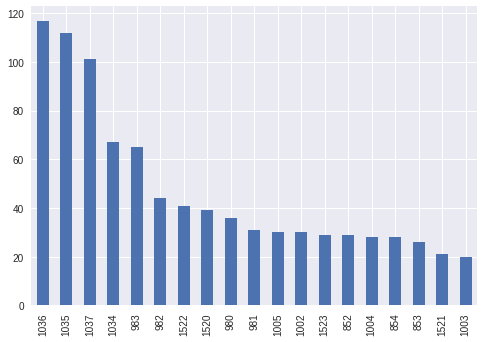

In [219]:
#Verificando quantas linhas constam com cada Id de loja e plotando num gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

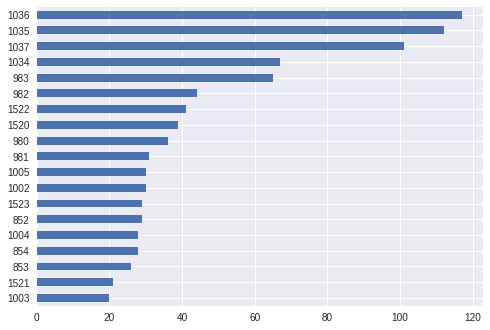

In [218]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh()

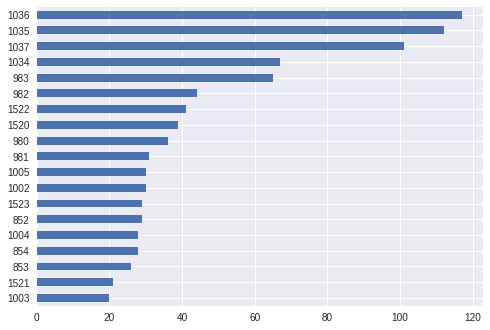

In [64]:
#Gráfico de barras horizontais, sem a linha na parte superior
df["LojaID"].value_counts(ascending=True).plot.barh();

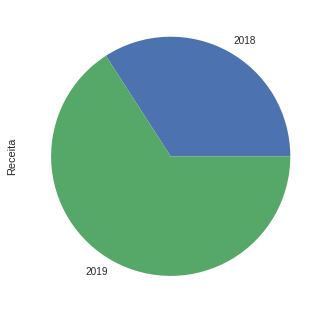

In [65]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

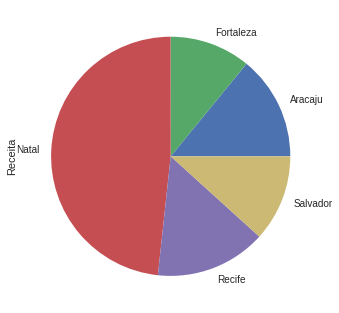

In [70]:
#Gráfico de pizza com Receita por Cidade
df.groupby(df["Cidade"])["Receita"].sum().plot.pie();

In [226]:
#Seccionando as vendas por ano (2018 e 2019), e atribuindo a variáveis específicas
df_2018 = df[df["Ano_Venda"] == 2018]
df_2019 = df[df["Ano_Venda"] == 2019]

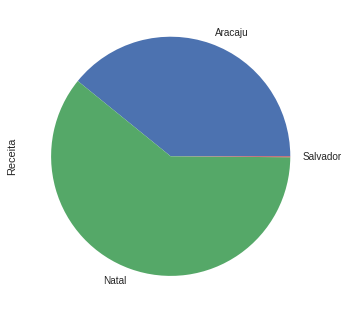

In [230]:
#Gráfico de pizza com Receita por Cidade em 2018
df_2018.groupby(df_2018["Cidade"])["Receita"].sum().plot.pie();

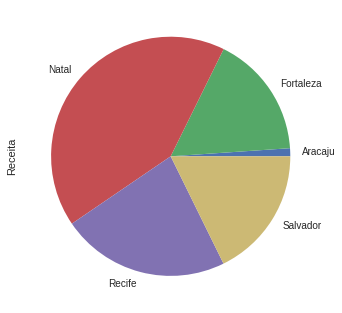

In [231]:
#Gráfico de pizza com Receita por Cidade em 2018
df_2019.groupby(df_2019["Cidade"])["Receita"].sum().plot.pie();

In [232]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de Vendas')

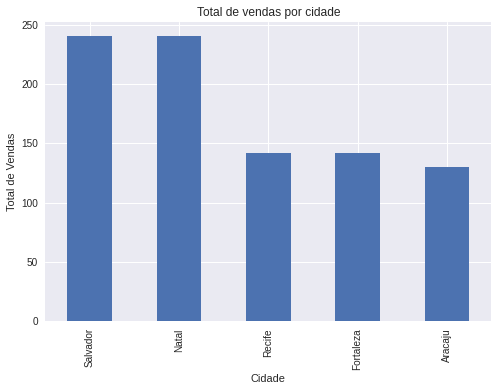

In [233]:
#Adicionando um título e alterando o nome dos ativos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

Text(0, 0.5, 'Total de Vendas')

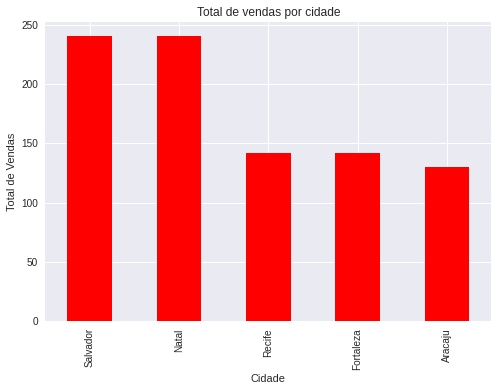

In [234]:
#Adicionando um título e alterando o nome dos ativos, e adicionando cor as barras
#Documentação do Matplotlib: https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

In [235]:
#Alterando o estilo
#Documentação do matplotlib: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("ggplot")

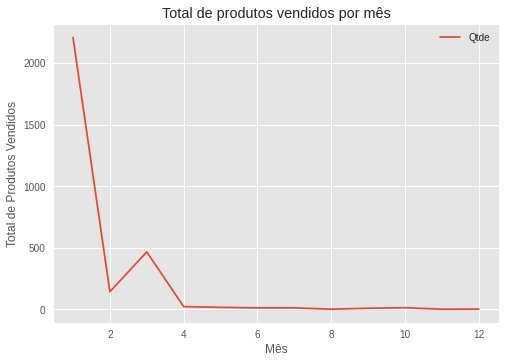

In [236]:
#Criando um novo gráfico
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();

In [237]:
#Retorna a quantidade de produtos vendidos por mês
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

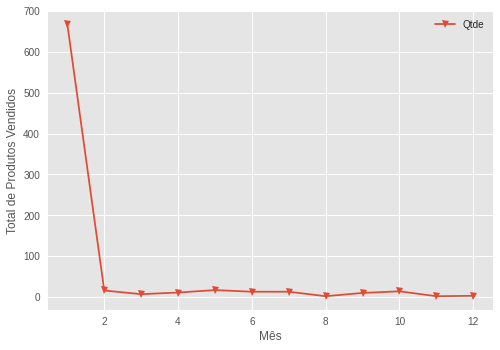

In [238]:
#Total de produtos vendidos por mês, em 2018, utilizando o arcador "v"
df_2018.groupby(df_2018["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();

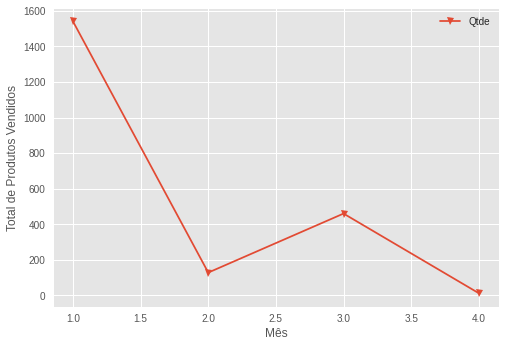

In [239]:
#Total de produtos vendidos por mês, em 2019, utilizando o arcador "v"
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos em 2019")
plt.legend();

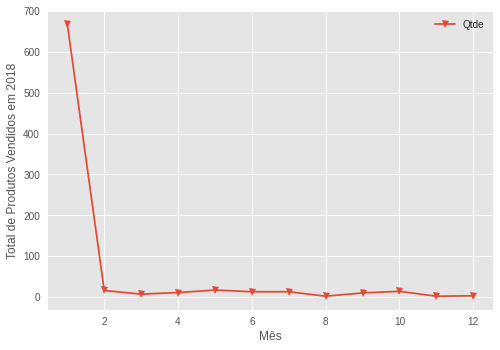

In [240]:
#Total de produtos vendidos por mês, em 2018, utilizando o arcador "v"
df_2018.groupby(df_2018["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos em 2018")
plt.legend();

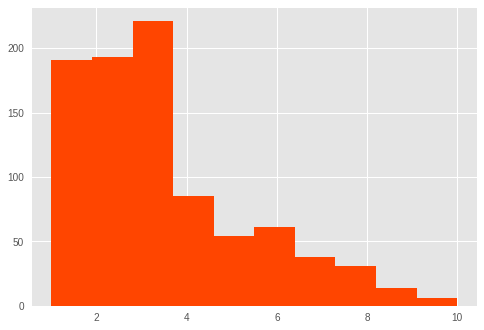

In [241]:
#Plotando um gráfico de histograma
#Documentação das cores: https://matplotlib.org/exemples/color/named_colors.html
plt.hist(df["Qtde"], color="orangered");

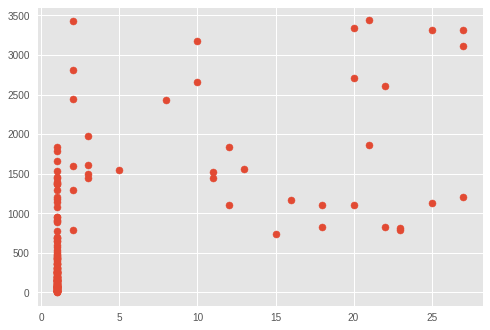

In [244]:
#Plotando o gráfico de dispersão referente ao ano de  2018
plt.scatter(x=df_2018["dia_venda"], y = df_2018["Receita"]);

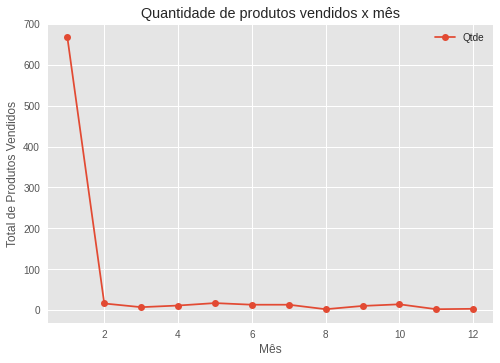

In [245]:
#Salvando o gráfico em png - Ano: 2018
df_2018.groupby(df_2018["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")

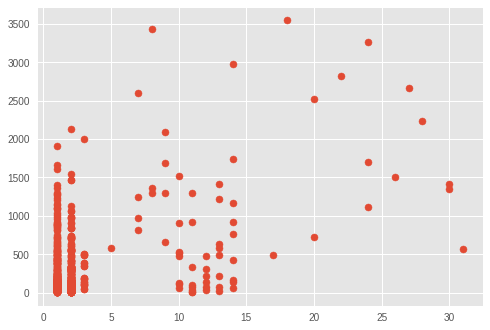

In [243]:
#Plotando o gráfico de dispersão referente ao ano de  2019
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

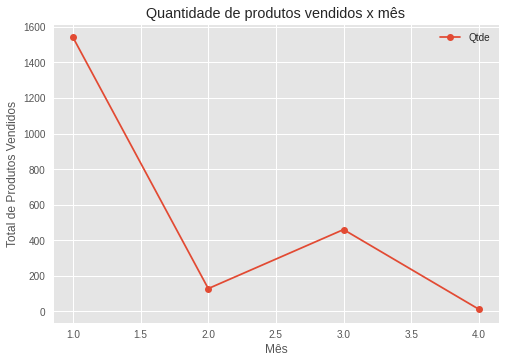

In [246]:
#Salvando o gráfico em png - Ano: 2019
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")

In [247]:
#Exportando o trabalho final para um novo arquivo, neste caso "df_vendas_nova.csv"
df.to_csv("df_vendas_nova.csv", index=False)

In [248]:
#Exportando o trabalho final para um novo arquivo, neste caso "df_vendas_nova.csv"
df_2018.to_csv("df_2018_vendas_nova.csv", index=False)

In [249]:
#Exportando o trabalho final para um novo arquivo, neste caso "df_vendas_nova.csv"
df_2019.to_csv("df_2019_vendas_nova.csv", index=False)